# Жаркова Ольга. Вариант 10

> ## *Подключаем библиотеки*

In [272]:
from __future__ import(absolute_import, division, print_function, unicode_literals)
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import interp
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [129]:
Label_Encoder = LabelEncoder()
Scalerd_Scaler = StandardScaler()

mush_rooms = pd.read_csv("mushrooms.csv")

> ## *1. Изучить набор данных. Создать описание набора данных на русском языке.  Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).*

1. *cap-shap* - Форма шляпки
2. *cap-surface* - Поверхность шляпки
3. *cap-color* - Цвет шляпки
4. *bruises* - Пятна
5. *odor* - Запах
6. *gill-attachment* - Форма пластин
7. *gill-spacing* - Расстояние между пластинами
8. *gill-size* - Размер пластин
9. *gill-color* - Цвет пластин
10. *stalk-shape* - Форма ножки
11. *stalk-root* - Корень
12. *stalk-surface-above-ring* - Форма ножки выше юбки
13. *stalk-surface-below-ring* - Форма ножки ниже юбки
14. *stalk-color-above-ring* - Цвет ножки выше юбки
15. *stalk-color-below-ring* - Цвет ножки ниже юбки
16. *veil-type* - Форма юбки
17. *veil-color* - Цвет юбки
18. *ring-number* - Количество колец
19. *ring-type* - Тип кольца
20. *spore-print-color* - Цвет спор
21. *population* - Популяция
22. *habitat* - Среда обитания

In [130]:
mush_rooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


> ## *2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;*

In [131]:
print(f'До удаление дубликатов: {len(mush_rooms)}')
mush_rooms.drop_duplicates(keep="first", inplace=False)
print(f'После удаление дубликатов: {len(mush_rooms)}')

До удаление дубликатов: 8124
После удаление дубликатов: 8124


## 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

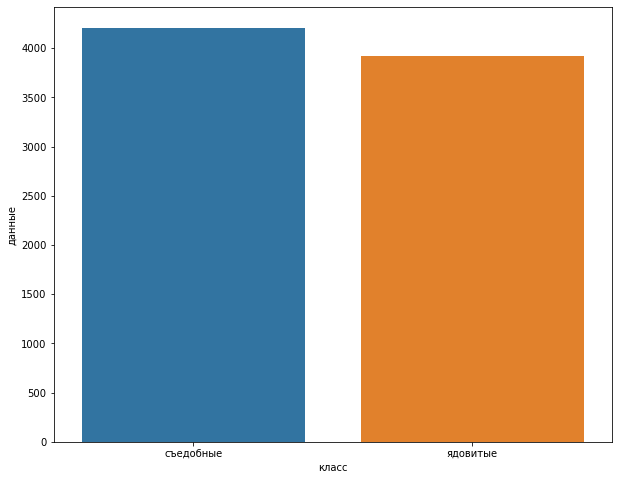

In [132]:
sns.barplot(data=pd.DataFrame({
    'данные': [
        len(mush_rooms.loc[mush_rooms["class"] == 'e']),
        len(mush_rooms.loc[mush_rooms["class"] == 'p']),
    ],
    'класс': [
        'съедобные',
        'ядовитые',
    ],
}), y='данные', x='класс') 


**Вывод:** Ядовитых элементов в классе меньше, чем съедобных. Классы не сбалансированы

## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ  масштабирования (например, нормализацию или стандартизацию);

**Вывод:** В наборе данных нет количественных признаков, значит масштабирование не нужно.

## 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;



In [133]:
for column in list(mush_rooms):
    mush_rooms[column] = pd.Series(Label_Encoder.fit_transform(mush_rooms[column]))
mush_rooms.head(10) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


**Примечание:** Я выбрала простейшую кодировку *sklearn.preprocessing.LabelEncoder* для категориальных признаков, что позволяет автоматически и легко закодировать всю таблицу, каждой букве в каждом столбце присвоена определенная цифра, которая показывает под каким номером в данном столбце стоит заданное буквенное значение.

## 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);


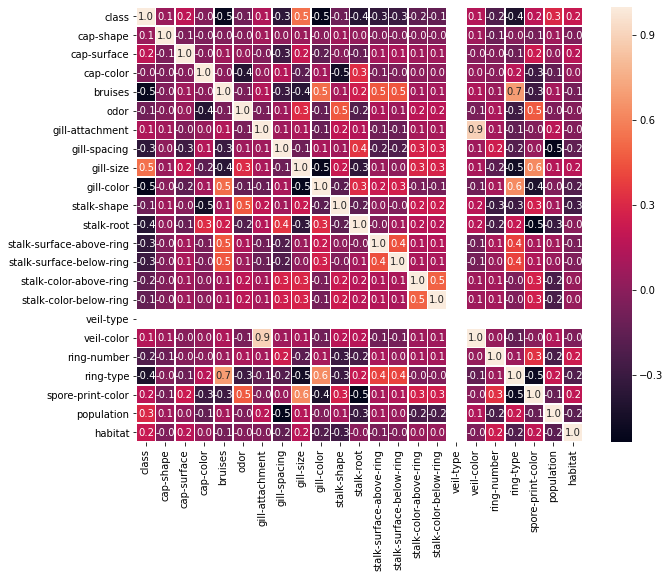

In [134]:
sns.heatmap(mush_rooms.corr(), annot = True, fmt = '.1f', linewidths = .5)

**Вывод:**

Минимальная корреация равная **-0.5** наблюдается между признаками 
 * *"class"* и *"bruises"*
 * *"class"* и *"gill-color"*
 * *"cap-color"* и *"stalk-shape"*
 * *"gill-spacing"* и *"population"*
 * *"gill-size"* и *"gill-color"*
 * *"gill-size"* и *"ring-type"*
 * *"stalk-root"* и *"spore-print-color"*
 * *"ring-type"* и *"spore-print-color"*

Максимальная корреация 
 * равная **0.9** между *"gill-attachment"* и *"veil-color"*
 * равная **0.7** между *"bruises"* и *"ring-type"*
 * равная **0.6** между *"gill-size"* и *"spore-print-color"*

## 7. Заполните пропущенные значения в данных;


In [135]:
mush_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

**Вывод:** Пропущенных значений в данных не имеется

## 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку  (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем«один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 


In [224]:
X_data, y_data = mush_rooms.drop("class", axis=1).values, mush_rooms["class"].values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4)

### *Классификатор Kближайших соседей(задаётся радиус для выбора ближайших объектов)*

In [277]:
RNN_1 = RadiusNeighborsClassifier(radius = 10)
RNN_1.fit(X_train, y_train)
model_params = RNN_1.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['radius'] = range(1, 30)
clf = GridSearchCV(KNeighborsClassifier(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_
r=best_params

print('Best params, r = ', r)

Best params, r =  4


In [279]:
RNN = RadiusNeighborsClassifier(radius = r)
RNN.fit(X_train, y_train) 
RNN_predict=RNN.predict(X_test)
#RNN_best_score = accuracy_score(y_test, RNN_predict)
RNN_best_score = np.mean(y_test==RNN.predict(X_test))
print('Class Placemark Forecast for RNN', RNN_predict)
print('Accuracy for RNN: ', RNN_score)

Class Placemark Forecast for RNN [1 1 1 ... 0 0 1]
Accuracy for RNN:  0.9956923076923077


### *Логический классификатор (бинарное решающее дерево)*

In [218]:
DTS = DecisionTreeClassifier()
params = {'max_depth': list(range(1,22)), 'max_features': list(range(1,22))}
DTS_grid = GridSearchCV(DTS, params)
DTS_grid.fit(X_train, y_train) #Постройте дерево решений из обучающего набора
DTS_grid_score = DTS_grid.best_score_
best_depth = DTS_grid.best_estimator_.max_depth
best_features = DTS_grid.best_estimator_.max_features
print('Best score for DTS: ', DTS_grid_score)
print('Features number for DTS: ', best_features)
print('Depth for DTS: ', best_depth)

Best score for DTS:  1.0
Features number for DTS:  18
Depth for DTS:  7


In [219]:
DTS = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTS.fit(X_train, y_train) #Постройте дерево решений из обучающего набора
DTS_predict = DTS.predict(X_test) #Прогнозировать класс или цель регрессии для X.
#DTS_best_score = accuracy_score(y_test, DTS_predict)
DTS_best_score = np.mean(y_test==DTS.predict(X_test)) #Возвращает точность по заданным данным испытаний и меткам.
print('Class Placemark Forecast for DTS', DTS_predict)
print('Accuracy for DTS', DTS_best_score)

Class Placemark Forecast for DTS [0 1 0 ... 0 0 0]
Accuracy for DTS 1.0


### *Находим вероятность для построения графиков*

In [231]:
y_test_inversion = [1-y for y in y_test]

RNN_proba = RNN.predict_proba(X_test)
DTS_proba = DTS.predict_proba(X_test)

print(RNN_proba)
print(DTS_proba)

[[0.     1.    ]
 [0.     1.    ]
 [0.     1.    ]
 ...
 [1.     0.    ]
 [1.     0.    ]
 [0.1875 0.8125]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


### *PR график*

In [221]:
def PR_graf(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

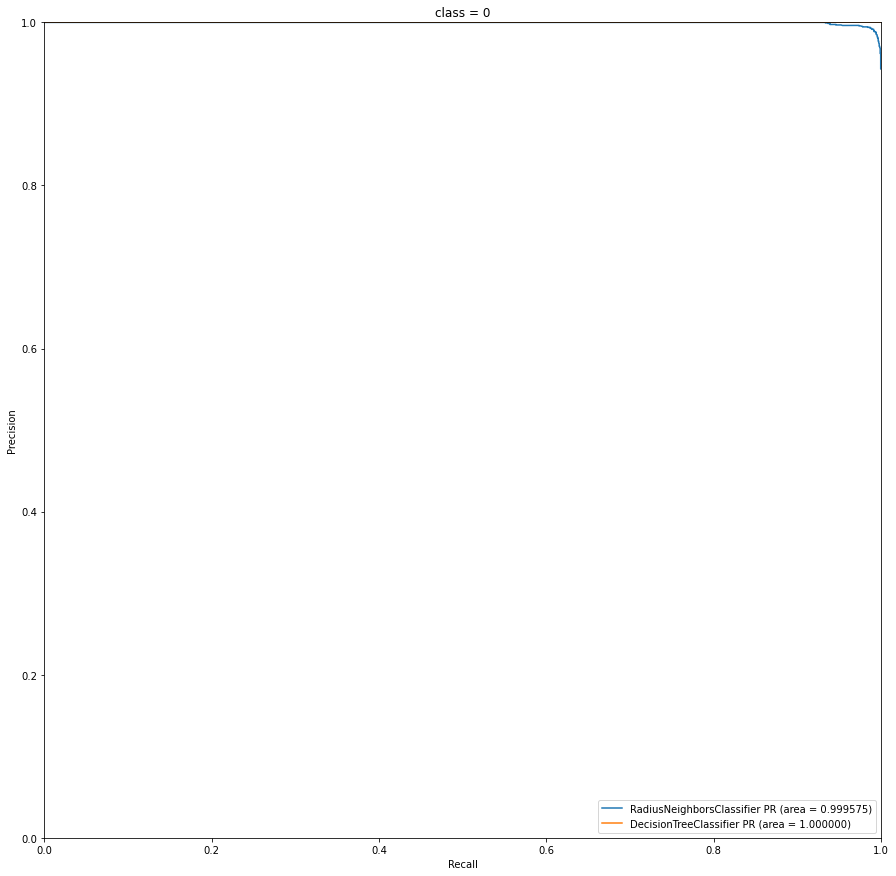

In [232]:
plt.figure(figsize=(15,15))

PR_graf(RNN_proba, 0, 'RadiusNeighborsClassifier', y_test_inversion)
PR_graf(DTS_proba , 0, 'DecisionTreeClassifier', y_test_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('class = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

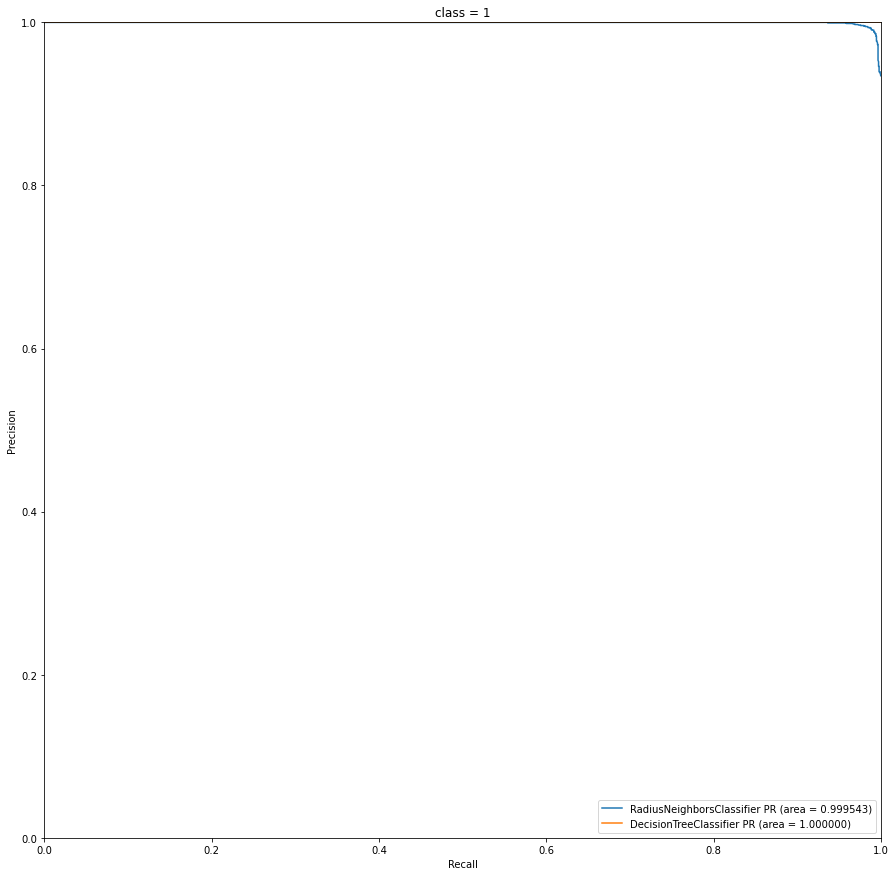

In [233]:
plt.figure(figsize=(15,15))

PR_graf(RNN_proba, 1, 'RadiusNeighborsClassifier', y_test)
PR_graf(DTS_proba, 1, 'DecisionTreeClassifier', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('class = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

### *ROC графики*

In [200]:
def ROC_graf_0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def ROC_graf_1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

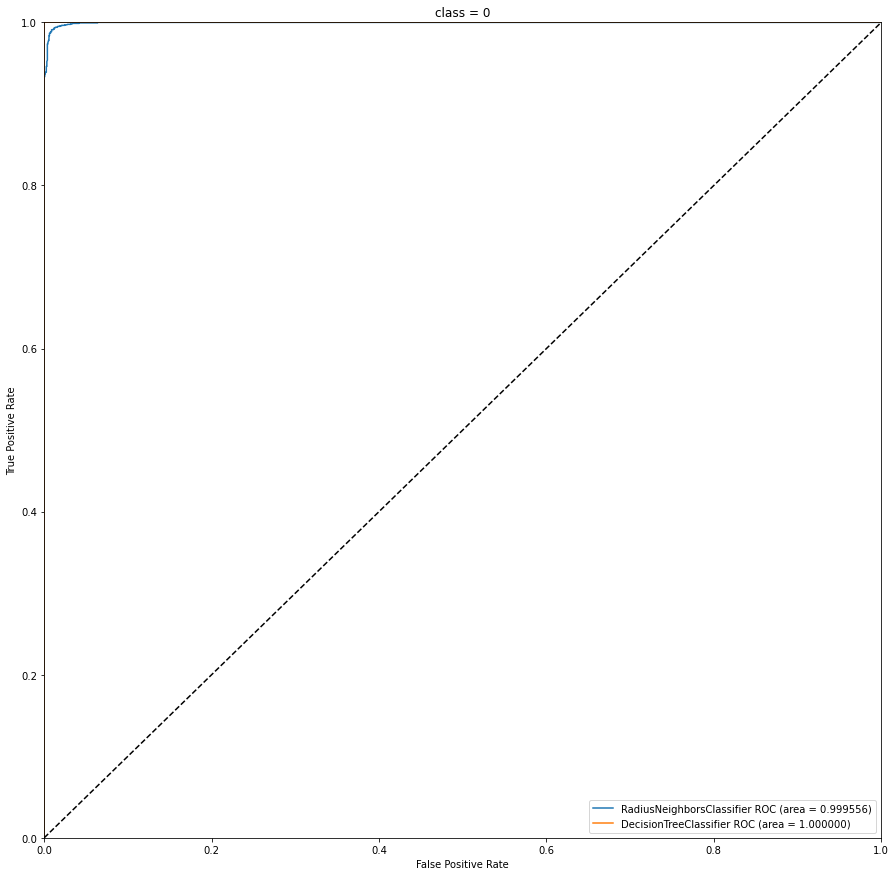

In [235]:
plt.figure(figsize=(15,15))

ROC_graf_0(RNN_proba,'RadiusNeighborsClassifier', y_test)
ROC_graf_0(DTS_proba,'DecisionTreeClassifier', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class = 0')
plt.show()

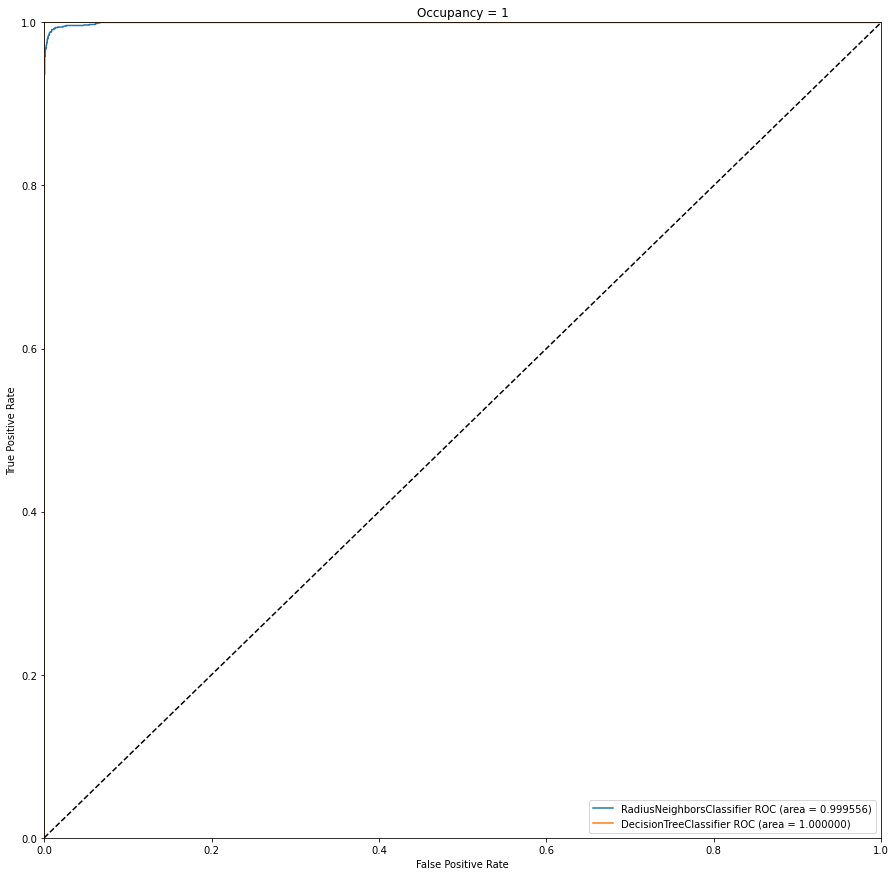

In [234]:
plt.figure(figsize=(15,15))

ROC_graf_1(RNN_proba,'RadiusNeighborsClassifier', y_test)
ROC_graf_1(DTS_proba,'DecisionTreeClassifier', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()

## 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

**Вывод:** Классификаторы Kближайших соседей(задаётся радиус для выбора ближайших объектов) и логический классификатор (бинарное решающее дерево) имеют примерно одинаковые показатели качества, если рассматривать PR и ROC кривые. Данные классификаторы правильно решают задачу предсказания класса с вероятностью 0.999~1.0.